In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-battery-dataset/cleaned_dataset/metadata.csv
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_49_50_51_52.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_45_46_47_48.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_05_06_07_18.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_29_30_31_32.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_25_26_27_28.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_33_34_36.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_53_54_55_56.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_41_42_43_44.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_38_39_40.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/data/02421.csv
/kaggle/input/nasa-battery-dataset/cleaned_dataset/data/04530.csv
/kaggle/input/nasa-battery-dataset/c

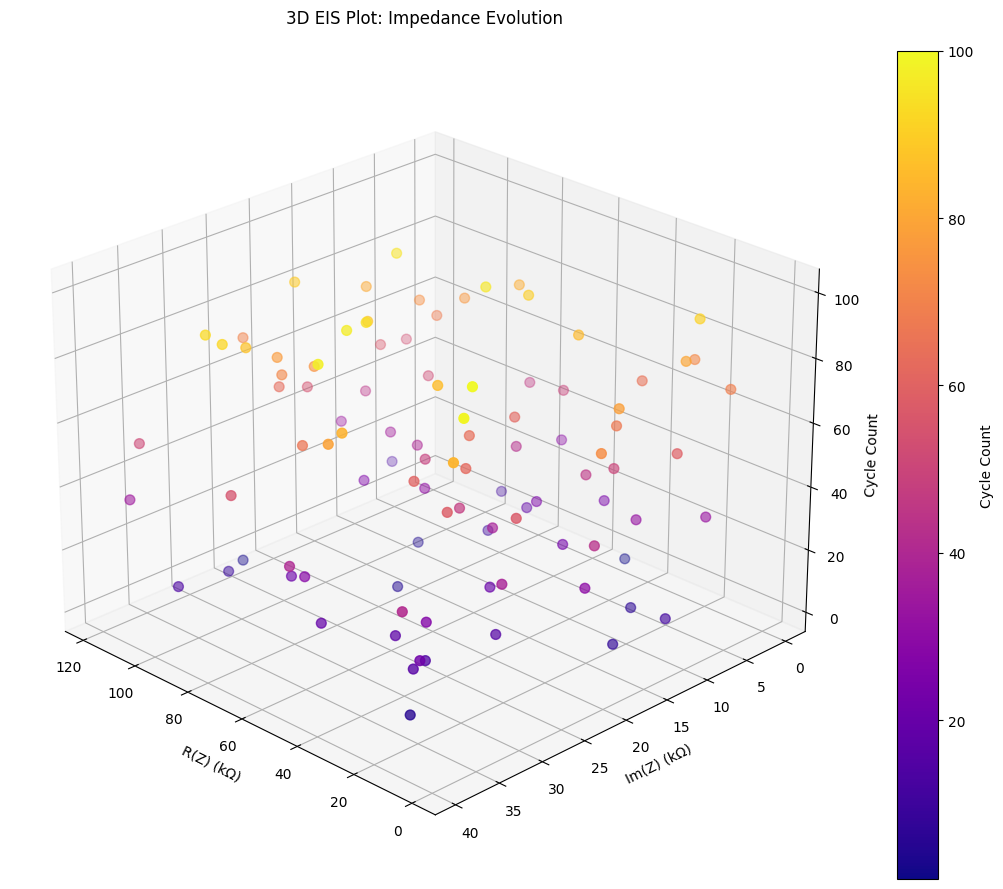

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate EIS data
np.random.seed(42)
cycle_count = np.arange(1, 101)
real_impedance = np.random.uniform(0, 120, 100)
imag_impedance = np.random.uniform(0, 40, 100)

# Create DataFrame
df = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance
}).sort_values('Cycle Count')

# Create 3D Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping to Cycle Count
scatter = ax.scatter(df['R(Z) (kΩ)'], df['Im(Z) (kΩ)'], df['Cycle Count'],
                     c=df['Cycle Count'], cmap='plasma', s=50)

# Axis labels and title
ax.set_xlabel('R(Z) (kΩ)')
ax.set_ylabel('Im(Z) (kΩ)')
ax.set_zlabel('Cycle Count')
ax.set_title('3D EIS Plot: Impedance Evolution', pad=20)

# Centering the graph and adding color bar
ax.view_init(elev=25, azim=135)
plt.colorbar(scatter, ax=ax, label='Cycle Count')

# Improve layout and display
plt.tight_layout()
plt.show()


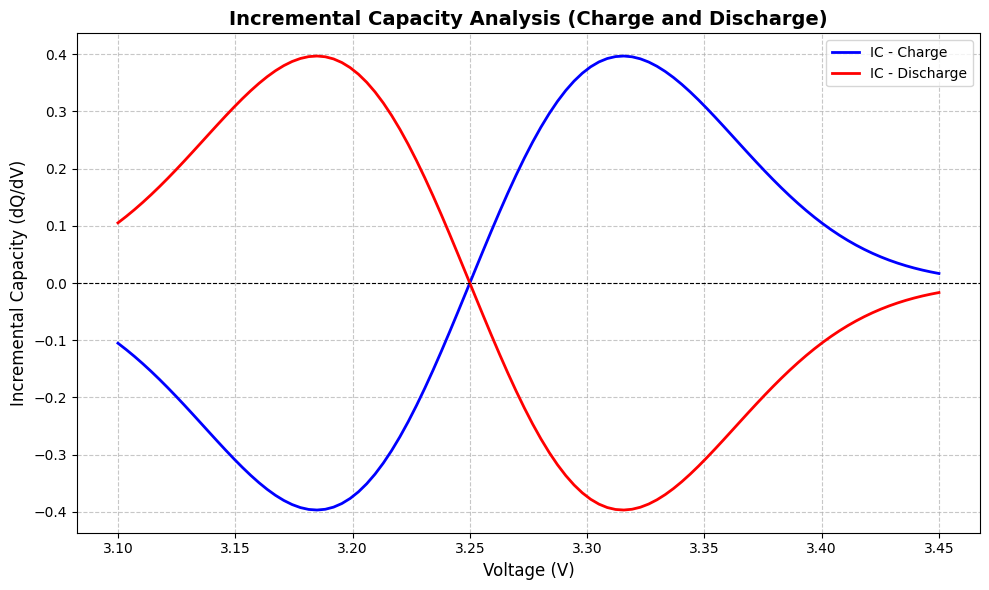

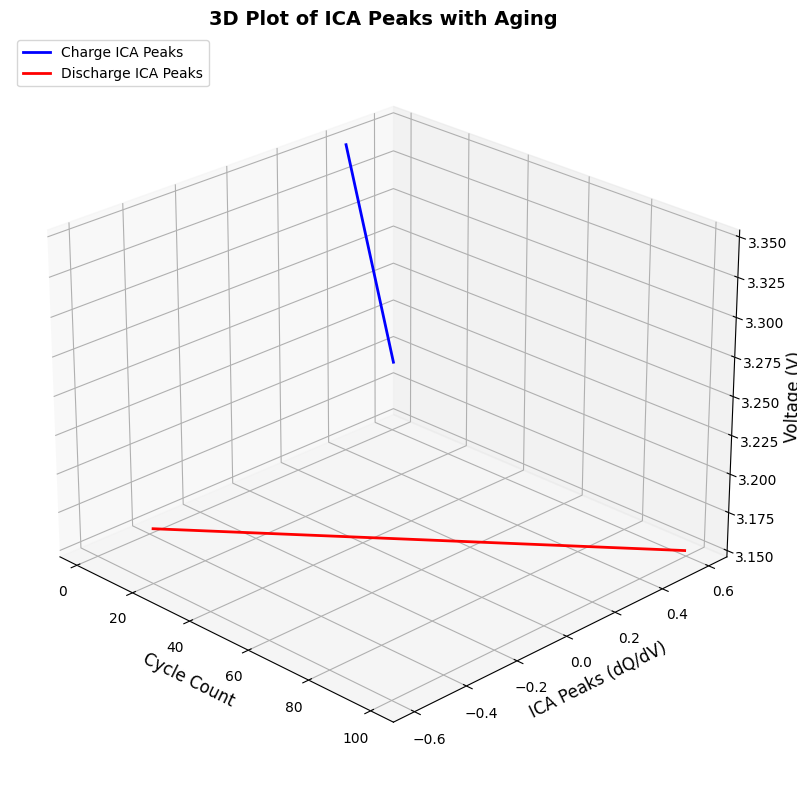

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate voltage range for charge and discharge
voltage_charge = np.linspace(3.1, 3.45, 100)
voltage_discharge = np.linspace(3.1, 3.45, 100)

# Simulate Incremental Capacity (dQ/dV) using sinusoidal and Gaussian components
dq_dv_charge = np.sin(10 * (voltage_charge - 3.25)) * np.exp(-(voltage_charge - 3.25)**2 / 0.01)
dq_dv_discharge = -np.sin(10 * (voltage_discharge - 3.25)) * np.exp(-(voltage_discharge - 3.25)**2 / 0.01)

# 2D Incremental Capacity Analysis (ICA) Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage_charge, dq_dv_charge, label="IC - Charge", color='blue', linewidth=2)
plt.plot(voltage_discharge, dq_dv_discharge, label="IC - Discharge", color='red', linewidth=2)
plt.xlabel("Voltage (V)", fontsize=12)
plt.ylabel("Incremental Capacity (dQ/dV)", fontsize=12)
plt.title("Incremental Capacity Analysis (Charge and Discharge)", fontsize=14, weight='bold')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Simulate aging effects on ICA peaks
cycle_count = np.arange(1, 101)  # 100 cycles
ica_peaks_charge = [np.max(dq_dv_charge) - (i * 0.01) for i in range(100)]  # Gradual peak decrease
ica_peaks_discharge = [np.min(dq_dv_discharge) + (i * 0.01) for i in range(100)]  # Gradual peak increase

# 3D Plot of ICA Peaks vs. Aging
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting charge and discharge peaks over cycles
ax.plot(cycle_count, ica_peaks_charge, zs=3.35, zdir='z', label="Charge ICA Peaks", color='blue', linewidth=2)
ax.plot(cycle_count, ica_peaks_discharge, zs=3.15, zdir='z', label="Discharge ICA Peaks", color='red', linewidth=2)

# 3D plot customization
ax.set_xlabel("Cycle Count", fontsize=12)
ax.set_ylabel("ICA Peaks (dQ/dV)", fontsize=12)
ax.set_zlabel("Voltage (V)", fontsize=12)
ax.set_title("3D Plot of ICA Peaks with Aging", fontsize=14, weight='bold')
ax.view_init(elev=25, azim=-45)  # Adjust viewing angle
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
MSE: 0.2752
MAE: 0.4091
R² Score: 0.9010


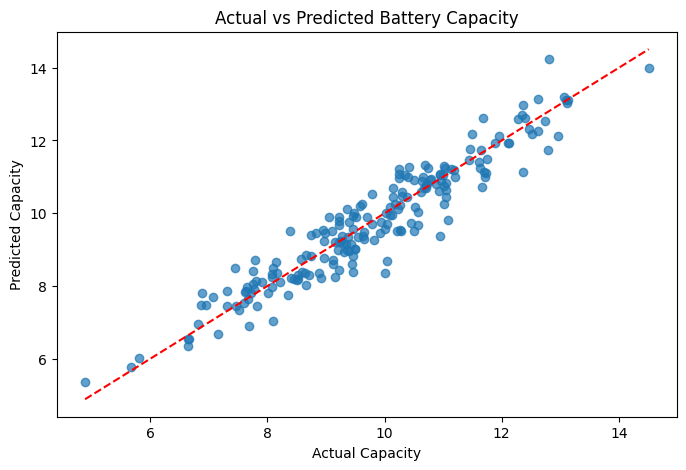

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Simulating EIS signature data
np.random.seed(42)
num_samples = 1000
num_features = 10  # Simulating 10 features representing EIS signatures

X = np.random.rand(num_samples, num_features)
y = 2 * np.sum(X, axis=1) + np.random.randn(num_samples) * 0.5  # Target with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Model
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Actual vs Predicted Battery Capacity')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (MSE): 1.2119
Mean Absolute Error (MAE): 0.8954
R-squared (R2): 0.9767
   Example Index                                           Features  \
0              0  {'Real Impedance (R(Z))': 77.19458621308237, '...   
1              1  {'Real Impedance (R(Z))': 97.8553714145801, 'I...   
2              2  {'Real Impedance (R(Z))': 8.54263781522748, 'I...   
3              3  {'Real Impedance (R(Z))': 29.04663258138005, '...   
4              4  {'Real Impedance (R(Z))': 108.90797687113117, ...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                34.123634                   33.010536    1.113098  
1                29.129595                   27.925498    1.204097  
2                49.831942                   48.201632    1.630310  
3                43.178298                   43.299057   -0.120758 

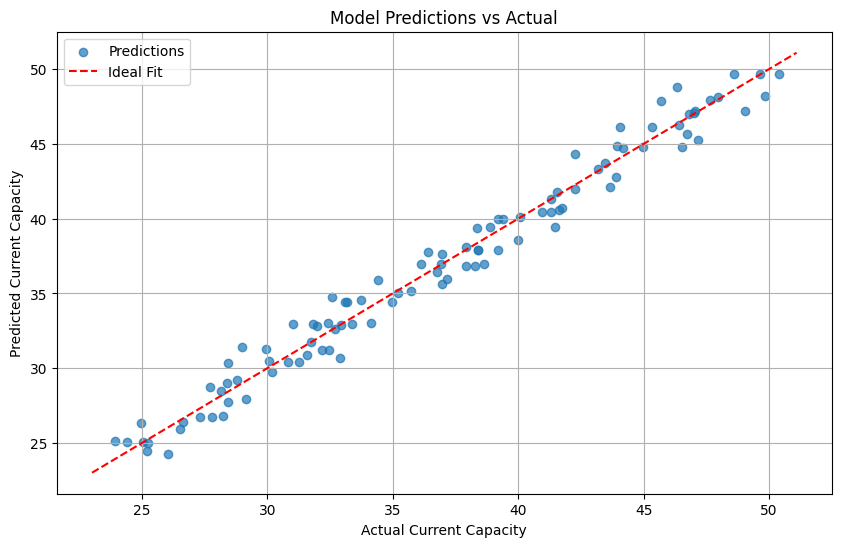

Model Evaluation (Full Test Set):
RMSE: 1.1009
MAE: 0.8954


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic EIS signature data and current capacity for ML model
np.random.seed(42)
n_samples = 500
real_impedance = np.random.uniform(0, 120, n_samples)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, n_samples)  # Simulated Im(Z) in kΩ
current_capacity = 50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, n_samples)  # Simulated capacity

# Create a DataFrame for the dataset
data_ml = pd.DataFrame({
    "Real Impedance (R(Z))": real_impedance,
    "Imaginary Impedance (Im(Z))": imag_impedance,
    "Current Capacity": current_capacity
})

# Split the data into training and testing sets
X = data_ml[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = data_ml["Current Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Example predictions
example_results = []
for idx in range(min(5, len(X_test))):  # Up to 5 examples
    features = X_test.iloc[idx:idx+1]
    actual = y_test.iloc[idx]
    prediction = best_model.predict(features)[0]
    example_results.append({
        "Example Index": idx,
        "Features": features.iloc[0].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)

# Plot true vs predicted capacities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

# Metrics
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


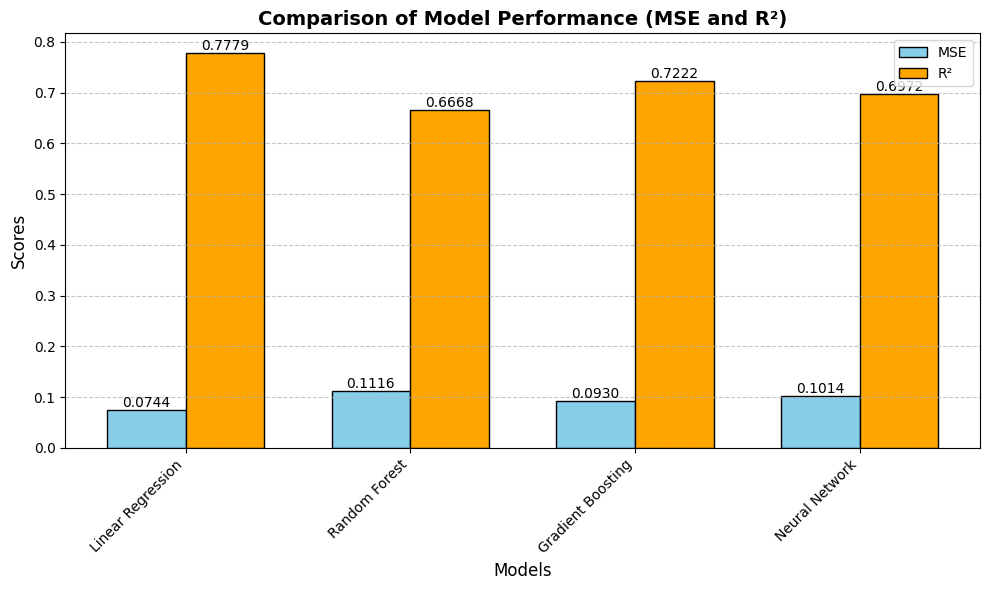


Cross-Validation Performance:
Linear Regression Cross-Validation MSE: 0.0859 ± 0.0042
Random Forest Cross-Validation MSE: 0.1334 ± 0.0113
Gradient Boosting Cross-Validation MSE: 0.1184 ± 0.0029
Neural Network Cross-Validation MSE: 0.1205 ± 0.0096


['best_gradient_boosting_model.pkl']

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Example data (Replace this with your actual dataset)
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = X @ np.random.rand(10) + np.random.rand(1000)  # Linear combination + noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with default parameters
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# Train and evaluate default models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Update the results for Gradient Boosting with tuned values
best_gb = grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R²': r2_score(y_test, y_pred_gb)
}

# Compare all models with bar plots
model_names = list(results.keys())
mse_scores = [metrics['MSE'] for metrics in results.values()]
r2_scores = [metrics['R²'] for metrics in results.values()]

# Bar plot comparison
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mse_scores, width, label='MSE', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, r2_scores, width, label='R²', color='orange', edgecolor='black')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performance (MSE and R²)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cross-validation for additional stability
print("\nCross-Validation Performance:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation MSE: {-np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Save the best Gradient Boosting model
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')

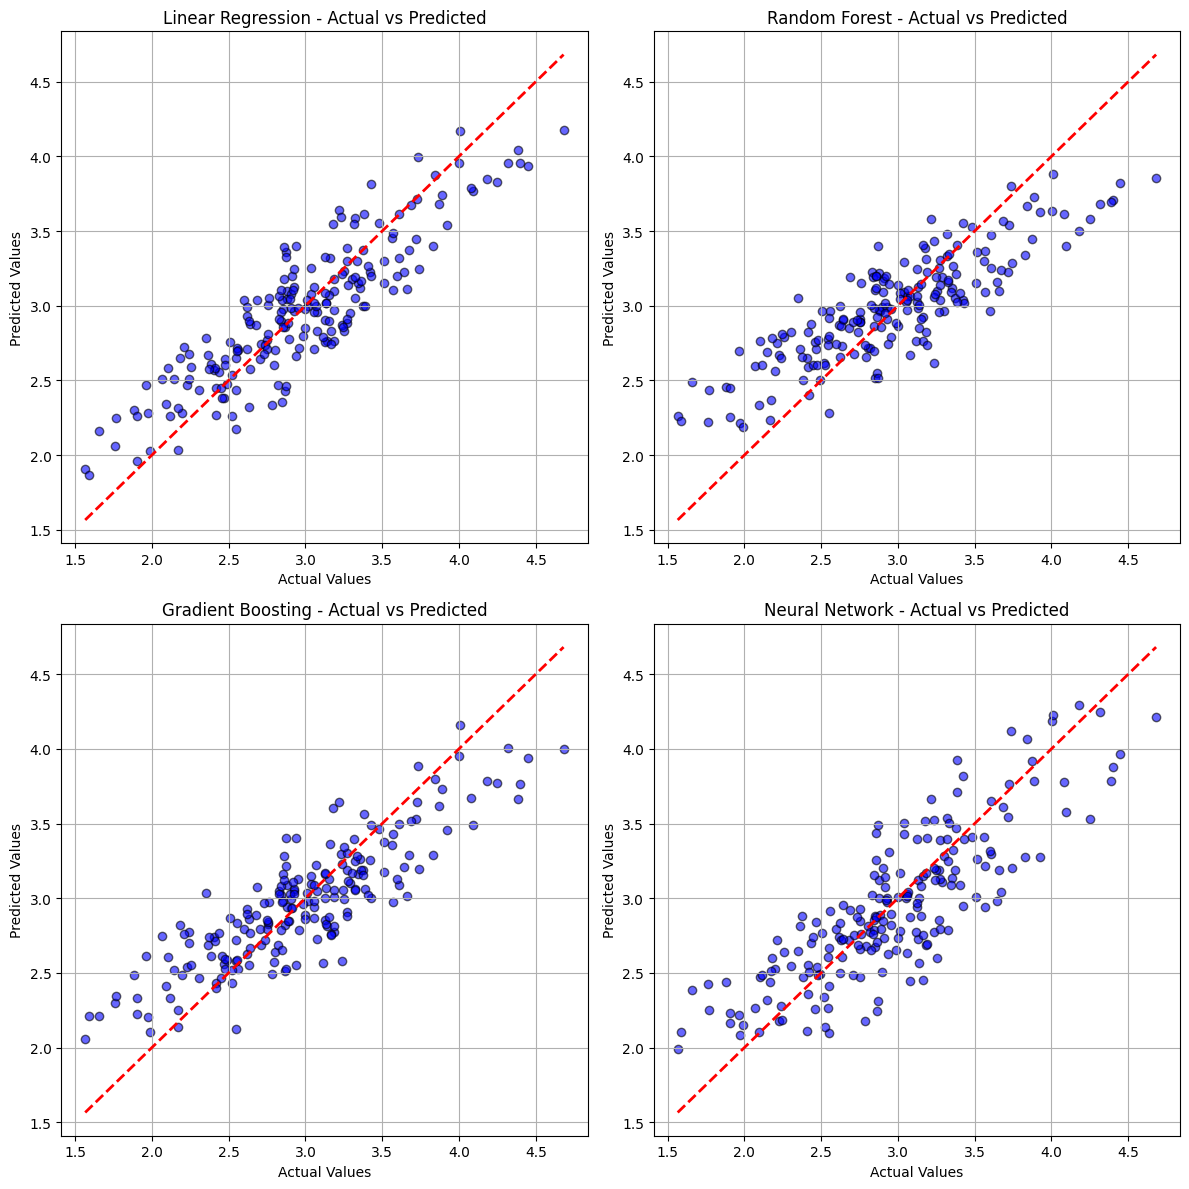

In [7]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(ax, y_actual, y_pred, title):
    ax.scatter(y_actual, y_pred, alpha=0.6, color='blue', edgecolor='k')
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Actual Values", fontsize=10)
    ax.set_ylabel("Predicted Values", fontsize=10)
    ax.grid(True)

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Square layout

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot for each model
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    plot_actual_vs_predicted(axes[idx], y_test, y_pred, f"{name} - Actual vs Predicted")

plt.tight_layout()
plt.show()
